In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
dataset= pd.read_csv("/kaggle/input/calcofi/bottle.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.shape

(864863, 74)

In [6]:
dataset.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

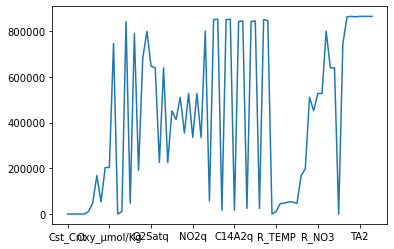

In [7]:
dataset.isnull().sum().plot()

In [8]:
for col in dataset.columns:
#     if ((dataset[col].isnull().sum()) == 0):
#         print("{0} : ".format(col),dataset[col].isnull().sum())
    if ((dataset[col].isnull().sum()) > 300000):
#         print("{0} : ".format(col),dataset[col].isnull().sum())
        print("'"+col+"',")

'BtlNum',
'T_qual',
'S_qual',
'O_qual',
'SThtaq',
'O2Satq',
'ChlorA',
'Phaeop',
'PO4uM',
'PO4q',
'SiO3uM',
'SiO3qu',
'NO2uM',
'NO2q',
'NO3uM',
'NO3q',
'NH3uM',
'C14As1',
'C14A1p',
'C14As2',
'C14A2p',
'DarkAs',
'DarkAp',
'MeanAs',
'MeanAp',
'IncTim',
'LightP',
'R_SIO3',
'R_PO4',
'R_NO3',
'R_NO2',
'R_NH4',
'R_CHLA',
'R_PHAEO',
'R_SAMP',
'DIC1',
'DIC2',
'TA1',
'TA2',
'pH2',
'pH1',
'DIC Quality Comment',


In [9]:
dataset.drop(['BtlNum','T_qual','S_qual','O_qual','SThtaq','O2Satq','ChlorA','Phaeop','PO4uM','PO4q','SiO3uM','SiO3qu','NO2uM','NO2q','NO3uM','NO3q','NH3uM','C14As1','C14A1p','C14As2','C14A2p','DarkAs','DarkAp','MeanAs','MeanAp','IncTim','LightP','R_SIO3','R_PO4','R_NO3','R_NO2','R_NH4','R_CHLA','R_PHAEO','R_SAMP','DIC1','DIC2','TA1','TA2','pH2','pH1','DIC Quality Comment'], axis = 1, inplace=True)

In [10]:
dataset.shape

(864863, 32)

In [11]:
dataset.isnull().sum()

Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC          10963
Salnty          47354
O2ml_L         168662
STheta          52689
O2Sat          203589
Oxy_µmol/Kg    203595
RecInd              0
T_prec          10963
S_prec          47354
P_qual         191108
Chlqua         225697
Phaqua         225693
NH3q            56564
C14A1q          16258
C14A2q          16240
DarkAq          24423
MeanAq          24424
R_Depth             0
R_TEMP          10963
R_POTEMP        46047
R_SALINITY      47354
R_SIGMA         52856
R_SVA           52771
R_DYNHT         46657
R_O2           168662
R_O2Sat        198415
R_PRES              0
dtype: int64

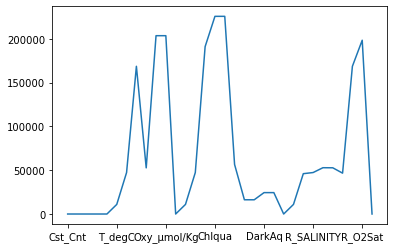

In [12]:
dataset.isnull().sum().plot()

In [13]:
for col in dataset.columns:
    if(dataset[col].dtype !=  "object"):
        mean_data = dataset[col].mean()
        dataset[col].fillna(mean_data, inplace=True)

In [14]:
dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,3.392468,25.649,57.103779,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,3.392498,57.19294,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,3.392468,25.656,57.103779,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,3.392498,57.19294,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,3.392468,25.654,57.103779,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,3.392498,57.19294,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,3.392468,25.643,57.103779,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,3.392498,57.19294,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,3.392468,25.643,57.103779,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,3.392498,57.19294,20


In [15]:
dataset.isnull().sum()

Cst_Cnt        0
Btl_Cnt        0
Sta_ID         0
Depth_ID       0
Depthm         0
T_degC         0
Salnty         0
O2ml_L         0
STheta         0
O2Sat          0
Oxy_µmol/Kg    0
RecInd         0
T_prec         0
S_prec         0
P_qual         0
Chlqua         0
Phaqua         0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         0
R_POTEMP       0
R_SALINITY     0
R_SIGMA        0
R_SVA          0
R_DYNHT        0
R_O2           0
R_O2Sat        0
R_PRES         0
dtype: int64

In [16]:
work_data = dataset.select_dtypes(exclude="object")
work_data.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq',
       'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA',
       'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES'],
      dtype='object')

In [17]:
work_data.head()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.50,33.440,3.392468,25.649,57.103779,148.808694,3,...,0.0,10.50,10.50,33.440,25.64,233.0,0.00,3.392498,57.19294,0
1,1,2,8,10.46,33.440,3.392468,25.656,57.103779,148.808694,3,...,8.0,10.46,10.46,33.440,25.65,232.5,0.01,3.392498,57.19294,8
2,1,3,10,10.46,33.437,3.392468,25.654,57.103779,148.808694,7,...,10.0,10.46,10.46,33.437,25.65,232.8,0.02,3.392498,57.19294,10
3,1,4,19,10.45,33.420,3.392468,25.643,57.103779,148.808694,3,...,19.0,10.45,10.45,33.420,25.64,234.1,0.04,3.392498,57.19294,19
4,1,5,20,10.45,33.421,3.392468,25.643,57.103779,148.808694,7,...,20.0,10.45,10.45,33.421,25.64,234.0,0.04,3.392498,57.19294,20


In [18]:
work_data.drop(['R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA',
       'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_PRES'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
work_data.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq'],
      dtype='object')

In [20]:
data = work_data.corr()["Salnty"].values
for index, value in enumerate(data):
    value = value * 100
    if(value > 20 or value < -20):
        print(index+1, value)

3 54.332597108035976
4 -48.99671659151925
5 100.0
6 -72.20557948786934
7 60.113707028860865
8 -70.8407140530769
9 -73.89748915688395


In [21]:
work_data.shape

(864863, 20)

In [22]:
work_data = work_data.iloc[:500,:]

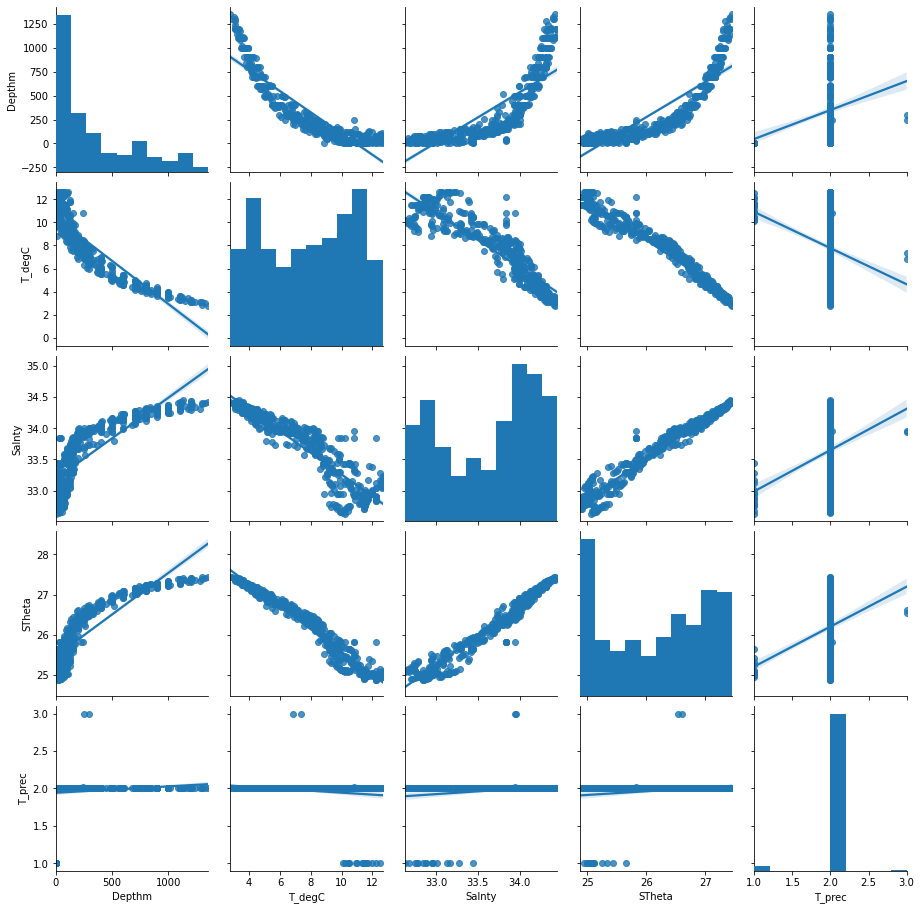

In [23]:
sns.pairplot(work_data, vars=['Depthm', 'T_degC', "Salnty",'STheta', 'T_prec'], kind="reg")

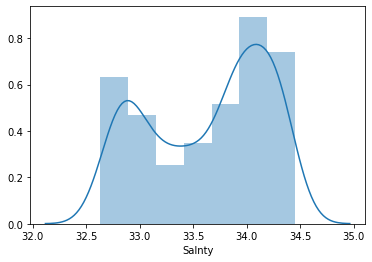

In [24]:
sns.distplot(work_data["Salnty"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb59984ad90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb59984e850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb59984a810>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb599855350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb599855890>],
 'means': []}

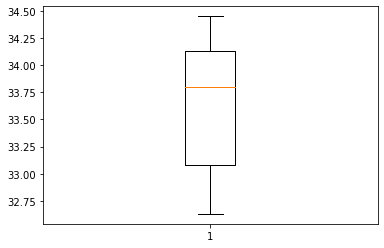

In [25]:
plt.boxplot(work_data["Salnty"])

In [26]:
# X = work_data.drop(["Salnty"], axis=1)
X = work_data[["T_degC"]]
Y = work_data[["Salnty"]]

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [28]:
xtest.shape

(150, 1)

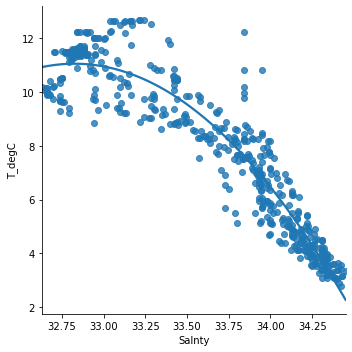

In [29]:
sns.lmplot(x="Salnty", y="T_degC", data=work_data,
           order=2, ci=None)

In [30]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [31]:
ypredict = model.predict(xtest)

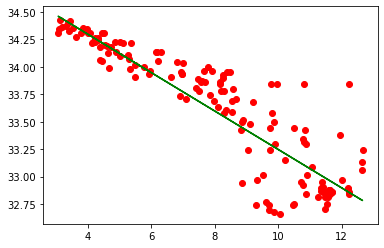

In [32]:
plt.scatter(xtest, ytest, color='r')
plt.plot(xtest, ypredict, color='g')
plt.show()

In [33]:
ypredict.shape

(150, 1)

In [34]:
accuracy = model.score(xtest, ytest)
print(accuracy * 100)

80.24273137246153


In [35]:
print(mean_absolute_error(ypredict, ytest))

0.17779926278665192


In [36]:
print(mean_squared_error(ypredict, ytest))

0.061170958438627195


In [37]:
print(np.sqrt(mean_squared_error(ypredict, ytest)))

0.24732763379498698
